# Transpose Trajectory

Takes a real glider trajectory and moves it to a [region covered by LLC4320](https://podaac.jpl.nasa.gov/datasetlist?ids=Processing+Levels&values=4+-+Gridded+Model+Output&search=Pre-SWOT+llc4320&view=list&provider=).

## Getting started

An example real glider trajectory can be obtained from [this repo](https://github.com/earthcube2021/ec21_balwada_etal). It's been saved in our repo as `CTD_659.nc`.

## Current status

**A finalized version code has been integrated into `Application2LLC.ipynb`.**

## Warning

The maps generated below were sanity checks; they take a long time to plot and are not pretty.

In [103]:
## Imports

# Third-party packages for data manipulation
import numpy as np
import pandas as pd
import xarray as xr

# Third-party packages for data visualizations
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

## Load data

In [104]:
# open glider files

ds_CTD_659 = xr.load_dataset('CTD_659.nc')

The data file is stored as a 1D array of measurements at each observation point, where the location (longitude, latitude, and depth) and time of measurement for the observation point are also part of the data set.

In [105]:
ds_CTD_659

<xarray.Dataset>
Dimensions:      (ctd_data_point: 1363330)
Dimensions without coordinates: ctd_data_point
Data variables:
    pressure     (ctd_data_point) float64 nan nan nan nan ... 1.165 1.037 nan
    latitude     (ctd_data_point) float64 -51.51 -51.51 -51.51 ... -51.7 -51.7
    longitude    (ctd_data_point) float64 30.03 30.03 30.03 ... 38.99 38.99
    temperature  (ctd_data_point) float64 3.564 3.561 3.56 ... 1.812 1.811 1.814
    salinity     (ctd_data_point) float64 nan nan nan nan ... 33.89 33.89 nan
    dives        (ctd_data_point) float64 1.0 1.0 1.0 1.0 ... 462.5 462.5 462.5
    time         (ctd_data_point) datetime64[ns] 2019-04-30T13:20:51.23000345...

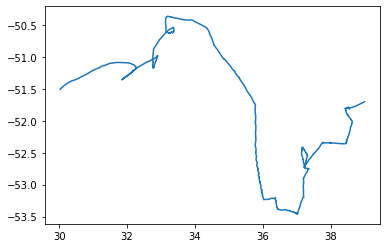

In [106]:
## Plot trajectory

plt.plot(ds_CTD_659.longitude.data, ds_CTD_659.latitude.data)
plt.show()

We want to transpose this dataset to the LLC4320 Southern Ocean region:

North Bounding Coordinate: -53.00567 degrees <br>
South Bounding Coordinate: -56.98995 degrees <br>
West Bounding Coordinate: 150.3021 degrees <br>
East Bounding Coordinate: 154.2812 degrees <br>

Ellipsoid: WGS 84

The current bounding box of the trajectory is:

North Bounding Coordinate: -50.363265 degrees <br>
South Bounding Coordinate: -53.458083 degrees <br>
West Bounding Coordinate: 30.026965 degrees <br>
East Bounding Coordinate: 38.99485 degrees <br>

<AxesSubplot:>

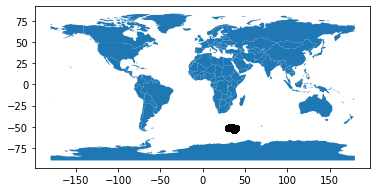

In [107]:
## Plot current trajectory on world map (SLOW)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df = pd.DataFrame({
        'lat':ds_CTD_659.latitude.data,
        'lon':ds_CTD_659.longitude.data
    })

original = gpd.GeoDataFrame(df,
    geometry=gpd.points_from_xy(df.lon, df.lat))

ax = world['geometry'].plot()
original['geometry'].plot(ax=ax, color="black")

In [108]:
## Transpose

# Lat
model_boundary_n = -53.00567
shifted_lat = ds_CTD_659.latitude.data - (max(ds_CTD_659.latitude.data) - model_boundary_n)

# Lon
model_boundary_w = 150.3021
shifted_lon = ds_CTD_659.longitude.data + (model_boundary_w - min(ds_CTD_659.longitude.data))

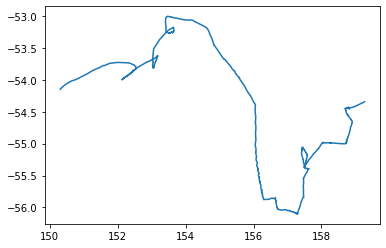

In [109]:
## Plot

plt.plot(shifted_lon, shifted_lat)
plt.show()

<AxesSubplot:>

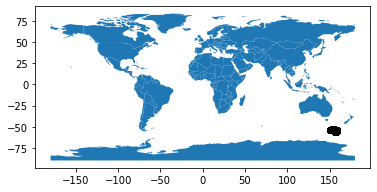

In [111]:
## Plot on world map (SLOW)

df = pd.DataFrame({
        'lat':shifted_lat,
        'lon':shifted_lon
    })

shifted = gpd.GeoDataFrame(df,
    geometry=gpd.points_from_xy(df.lon, df.lat))

ax = world['geometry'].plot()
shifted['geometry'].plot(ax=ax, color="black")